# Multi-class Classification and Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load MATLAB files
from scipy.io import loadmat
from scipy.optimize import fmin_cg

from sklearn.linear_model import LogisticRegression

## Load matlab data

In [2]:
data = loadmat("ex3data1.mat")

Data is a dictionary form. Get the keys in the dictionary

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

There is two keys in the dictionary, they are X and y. Check shape of X and y

In [4]:
print("X's shape: ", data['X'].shape)

X's shape:  (5000, 400)


In [5]:
print("Y's shape: ", data['y'].shape)

Y's shape:  (5000, 1)


X contains 5000 data sample of handwriting, each handwriting image is formated in 20x20 pixels image.
Y contains the label of each corresponding image.

In [6]:
# Get X
X_raw = data['X']
# Add ones to X_raw
X = np.c_[np.ones(X_raw.shape[0]).T, X_raw]
print("Shape of X: ", X.shape)
# Get y
y = data['y']
# m, n
m, n = X.shape

Shape of X:  (5000, 401)


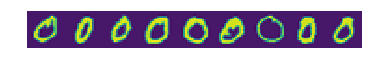

In [7]:
plt.imshow(X[1:10, 1:].reshape(-1,20).T)
plt.axis('off');
plt.show()

## Vectorizing Logistic Regression

Sigmoid function

In [8]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

We will use fmin_cg function to optimize the Logistic Regression function.
The document of fmin_cg is described as following:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html

Cost function

In [9]:
def lrCostFunction(theta, X, y, lamda = 0):
    theta = np.reshape(theta, (theta.size, 1))
    m, n = X.shape
    h = sigmoid(X.dot(theta))
    J = np.mean(-y * np.log(h) - (1 - y) * np.log(1 - h))
    J += (lamda/(2*m))*np.sum(np.square(theta[1:]))
    return J

Grandient of logistic regression

In [10]:
def lrGradient(theta, X, y, lamda = 0):
    m, n = X.shape
    theta = np.reshape(theta, (theta.size, 1))
    h = sigmoid(X.dot(theta))
    grad = np.dot(X.T, h - y) / m
    grad[1:] = grad[1:] + (lamda/m) * theta[1:]
    return(grad.flatten())

In [11]:
#This function checks the probability of being number C and not C
def oneVsAll(X,y,lamda,num_labels):
    
    #run configuration for numbers C
    
    m, n = X.shape;
    all_theta = np.zeros((num_labels, n))
    initTheta = np.zeros(n);
    max_iters = 500;
    for k in np.arange(1, 11):
        Y = (y == (k)).astype(int)
        all_theta[k % 10, :] = fmin_cg(lrCostFunction,initTheta,fprime = lrGradient,args=(X,Y,lamda), maxiter = max_iters,disp = 0)
        print("Finished checking OneVsAll number: ", k % 10);
    print("Finished checking all number ");
    return all_theta

In [12]:
all_theta = oneVsAll(X, y, 0.1, 10);

Finished checking OneVsAll number:  1
Finished checking OneVsAll number:  2
Finished checking OneVsAll number:  3
Finished checking OneVsAll number:  4
Finished checking OneVsAll number:  5
Finished checking OneVsAll number:  6
Finished checking OneVsAll number:  7
Finished checking OneVsAll number:  8
Finished checking OneVsAll number:  9
Finished checking OneVsAll number:  0
Finished checking all number 


In [13]:
all_theta.shape

(10, 401)

In [14]:
def predictOneVsAll(all_theta, X):
    m, n = X.shape;
    # X : m * n
    # all_theta: n_label * n
    prob = sigmoid(X.dot(all_theta.T));
    pred = np.argmax(prob, axis=1)
    return pred

In [15]:
pred = predictOneVsAll(all_theta, X);

In [16]:
def accuracy(pred,y):
    pred.shape = (pred.size,1)
    return np.mean((pred == y % 10))*100

In [17]:
print("Training set accuracy is ", accuracy(pred, y))

Training set accuracy is  90.3


# Neutrual Network

In [18]:
weights = loadmat("ex3weights.mat")

In [19]:
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [20]:
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [21]:
print("Theta1's shape ", Theta1.shape)
print("Theta2's shape ", Theta2.shape)

Theta1's shape  (25, 401)
Theta2's shape  (10, 26)


Neutrual networks feed forward

In [22]:
z1 = X.dot(Theta1.T)
a1 = sigmoid(z1)

In [23]:
a1 = np.c_[np.ones((a1.shape[0], 1)), a1]

In [24]:
z2 = a1.dot(Theta2.T)
a2 = sigmoid(z2)

In [25]:
pred = np.argmax(a2, axis=1)

In [26]:
pred = (pred + 1) % 10

In [27]:
print("Training set accuracy by neutrual network is ", accuracy(pred, y))

Training set accuracy by neutrual network is  97.52
